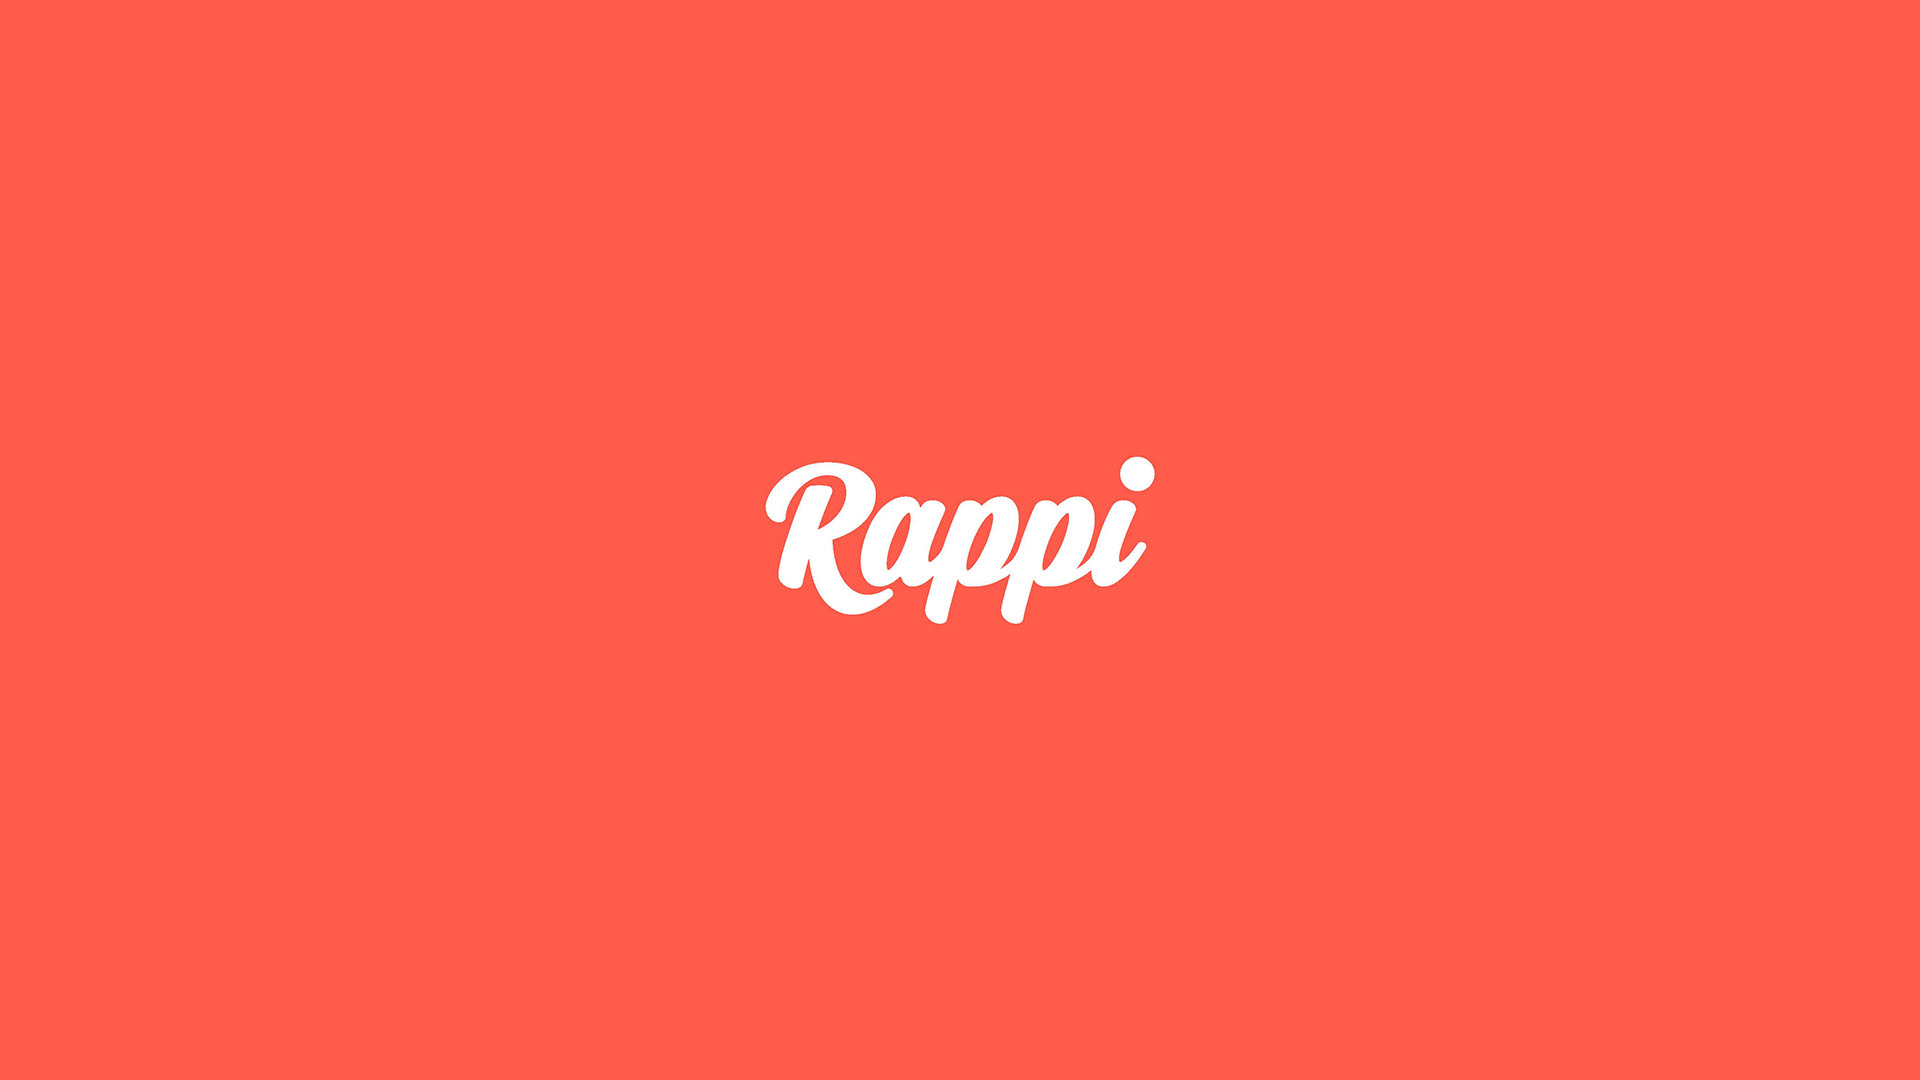


# **Instalação de bibliotecas** 

* bibliotecas (um conjunto de módulos e funções úteis que reduzem o uso de código no programa.)

In [ ]:
# Importação das bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import date
from datetime import datetime
import seaborn as sns; sns.set();
import plotly.express as px;
import pyarrow.feather as feather
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#ativação do google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importação das features**

* Importando as colunas que foram criadas/obtidas com base nas hipoteses

In [ ]:
#importação da features taxa de aceitação 
acceptance_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/acceptance_tax.csv")
  
#importação da coluna com todos os entregadores
all_storekeepers = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/all_storekeepers.csv")

#importação da feature de auto aceite
auto_accept = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/auto_accept.csv")

#importação da feature de quantitativo de churns
churns_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/churns_quantitative.csv")

#importação da feature de defeitos medios
defects_mean = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/defects_mean.csv")

#importação da feature de ganho medio por modal
media_modal = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/media_modal.csv")

#importação da feature de quantitativo de punições
punishment_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/punishment_quantitative.csv")

#importação da feature de taxa de cancelamento de pedidos
storekeeper_cancel_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_cancel_tax.csv")

#importação da feature de categoria do entregador
storekeeper_category = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_category.csv")

In [ ]:
# removendo a coluna intitulada de "Churn(sim=1/não=0)_x" para evitar bugs

all_storekeepers = all_storekeepers.drop(columns = ["Churn(sim=1/não=0)_x"])
auto_accept = auto_accept.drop(columns = ["Churn(sim=1/não=0)_x"])
churns_quantitative = churns_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
defects_mean = defects_mean.drop(columns = ["Churn(sim=1/não=0)_x"])
media_modal = media_modal.drop(columns = ["Churn(sim=1/não=0)_x"])
punishment_quantitative = punishment_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_cancel_tax = storekeeper_cancel_tax.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_category = storekeeper_category.drop(columns = ["Churn(sim=1/não=0)_x"])

# **Manipulação dos dados**

* Manipulação dos dados para facilitar a analise do modelo

In [ ]:
# fazendo o merge das features para criarmos o dataframe que será utilizado no modelo

a = acceptance_tax.merge(auto_accept, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de taixa de aceitacao

b = a.merge(churns_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de quantidades de churn, no final acabou nao sendo utilizada

c = b.merge(defects_mean, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de quantidades de defeitos

d = c.merge(media_modal, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature do modal ultilizado pelo entregador

e = d.merge(punishment_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature com a quantidade de punicoes levadas pelo entregador

f = e.merge(storekeeper_cancel_tax, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID')
# Feature com a quantidade de cancelamentos de entregas feito pelo entregador

g = f.merge(storekeeper_category, how='inner', left_on='STOREKEEPER_ID', right_on='ID').drop(columns=['ID_x','ID_y'])
# Feature da categoria que o entregador se apresenta

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [ ]:
# removendo colunas que não serão utilizadas no modelo
g = g.drop(columns = ['STOREKEEPER_ID', 'LEVEL_NAME', 'Count', 'TRANSPORTE', 'Churn(sim=1/não=0)_x'])

In [ ]:
g

,ACCEPTANCE_RATE,AUTO_ACEITE,ORDERS,Media_Modal_sim1_não0,Quantidade Punições,Taxa,Earning_Cat
0,0.666102,True,5.189542,1.0,11.0,0.044025,0.0
1,0.556538,True,3.806122,1.0,86.0,0.103806,1.0
2,0.777838,True,8.109375,1.0,27.0,0.042910,1.0
3,0.160980,True,2.945946,0.0,13.0,0.030000,0.0
4,0.856102,True,6.764286,1.0,160.0,0.089799,1.0
...,...,...,...,...,...,...,...
164526,0.000000,True,2.000000,0.0,0.0,0.000000,0.0
164527,0.000000,False,1.105263,0.0,1.0,0.281046,0.0
164528,0.000000,False,1.041667,0.0,1.0,0.960000,0.0
164529,0.000000,False,1.066667,0.0,0.0,1.000000,0.0


# **Importando o Deploy**

* Inicialmente instalamos a biblioteca joblib para carregarmos o modelo preditivo que foi criado
*  Criamos um algoritmo que faz uma classificação na probabilidade de churn dos entregadores, categorizando os entregadores de 1 a 5 (do menos propenso ao mais propenso a dar churn 
* Limpamos o dataframe, de forma que só podemos visualizar o ID e o nível de propensão a dar churn


In [ ]:
# importando biblioteca que puxa o modelo preditivo que criamos
from joblib import load

# criando uma variavel com o modelo Random Forest que desenvolvemos
rf_loaded = load('/content/drive/Shareddrives/Bases Compartilhadas/modelRandomf')

# criando uma variavel com o modelo Gradient Booster que desenvolvemos
gb_loaded = load('/content/drive/Shareddrives/Bases Compartilhadas/modelGradientB')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results.

In [ ]:
# fazendo uma previsão indicando a probabilidade do storekeeper dar ou não churn
previsionRF = rf_loaded.predict_proba(g)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# a estrutura abaixo tem como finalidade classificar as probabilidades de churn em categorias de 1 a 5 (do menos a mais propenso a dar churn)

prob_predict = []

for i in range(len(previsionRF)):
  # entregadores com probabilidade de churn maior que 0.8 são classificados com 5
  if previsionRF[i][1] >= 0.8:
    prob_predict.append(5)
    
  # entregadores com probabilidade de churn entre 0.8 e 0.65 são classificados com 4
  elif previsionRF[i][1] < 0.8 and previsionRF[i][1] >= 0.65:
    prob_predict.append(4)

  # entregadores com probabilidade de churn entre 0.65 e 0.35 são classificados com 3
  elif previsionRF[i][1] < 0.65 and previsionRF[i][1] >= 0.35:
    prob_predict.append(3)

  # entregadores com probabilidade de churn entre 0.35 e 0.15 são classificados com 2
  elif previsionRF[i][1] < 0.35 and previsionRF[i][1] >= 0.15:
    prob_predict.append(2)

  # entregadores com probabilidade de churn abaixo de 0.15 são classificados com 1
  elif previsionRF[i][1] < 0.15:
    prob_predict.append(1)

In [ ]:
# transformando o array com as classificações em uma coluna 
df_prob = pd.DataFrame(prob_predict)

In [ ]:
# trazendo o dataframe principal, que tem como finalidade obter os ID's
g = f.merge(storekeeper_category, how='inner', left_on='STOREKEEPER_ID', right_on='ID').drop(columns=['ID_x','ID_y'])

# fazendo a junção da coluna de classificação com o dataframe principal
g['Probabilidade Churn'] = df_prob

# criando o dataframe final, que possuirá apenas a coluna de Storekeeper e a classificação da probabilidade de churn
df_final = g[['STOREKEEPER_ID', 'Probabilidade Churn']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


#Criação do Excel
* Cria o excel final, que apresenta o ID e a probabilidade de churn do entregador (de 1 a 5)
* No final é realizado o download do excel para o computador do usuário, para que ele possa fazer as devidas análises

In [ ]:
# criando um arquivo excel
datatoexcel = pd.ExcelWriter('Predict_Churn.xlsx')
  
# transformando o dataframe em excel
df_final.to_excel(datatoexcel)
  
# salvando o excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

# baixando o documento
from google.colab import files
files.download('Predict_Churn.xlsx')

DataFrame is written to Excel File successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>